In [12]:
import gym 
import numpy as np
import time

In [3]:
 # we are going to use the FrozenLake enviornment
env = gym.make('FrozenLake-v0') 

In [4]:
 # get number of states
print(env.observation_space.n) 
 # get number of actions
print(env.action_space.n)  

16
4


In [5]:
# reset enviornment to default state
env.reset()  

0

In [8]:
 # get a random action 
action = env.action_space.sample() 
print(action)

2


In [9]:
 # take action, notice it returns information about the action
new_state, reward, done, info = env.step(action) 

In [10]:
# render the GUI for the enviornment 
env.render()   

  (Right)
SFFF
FHFH
FFFH
HFFG


In [27]:

env = gym.make('FrozenLake-v0')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

In [28]:
# create a matrix with all 0 values 
Q = np.zeros((STATES, ACTIONS))  
Q

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [29]:
#Picking an Action
#1. Randomly picking a valid action
#2. Using the current Q-Table to find the best action.

# start with a 90% chance of picking a random action
epsilon = 0.9  

# code to pick action
# we will check if a randomly selected value is less than epsilon.
if np.random.uniform(0, 1) < epsilon:  
     # take random action
    action = env.action_space.sample() 
else:
    # use Q table to pick best action based on current values
    action = np.argmax(Q[STATES, :])  

In [30]:
#Updating Q Values
#Q[state,action]=Q[state,action]+α∗(reward+γ∗max(Q[newState,:])−Q[state,action])


In [31]:
# how many times to run the enviornment from the beginning
EPISODES = 1500 

# max number of steps allowed for each run of enviornment
MAX_STEPS = 100  

 # learning rate
LEARNING_RATE = 0.81 
GAMMA = 0.96

# if you want to see training set to true
RENDER = False 

epsilon = 0.9

In [32]:
#Putting it Together
rewards = []
for episode in range(EPISODES):

  state = env.reset()
  for _ in range(MAX_STEPS):
    
    if RENDER:
      env.render()

    if np.random.uniform(0, 1) < epsilon:
      action = env.action_space.sample()  
    else:
      action = np.argmax(Q[state, :])

    next_state, reward, done, _ = env.step(action)

    Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[next_state, :]) - Q[state, action])

    state = next_state

    if done: 
      rewards.append(reward)
      epsilon -= 0.001
      break  # reached goal

print(Q)
print(f"Average reward: {sum(rewards)/len(rewards)}:")
# and now we can see our Q values!

[[3.37917241e-01 1.59841652e-02 1.42235733e-02 1.21309625e-02]
 [3.21608450e-03 4.60732254e-03 4.97559702e-03 1.60088896e-02]
 [4.82278962e-03 7.51016625e-03 1.12793918e-02 9.39247017e-03]
 [3.07048686e-03 7.83234426e-03 1.83904677e-03 1.22029035e-02]
 [3.73920127e-01 5.61810448e-03 7.92995114e-03 3.15463857e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.96782348e-05 4.73771880e-05 1.97977213e-01 1.48366294e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.51113174e-03 7.79448482e-03 8.55254258e-03 4.64411728e-01]
 [2.43831565e-03 5.79675053e-01 2.63696074e-03 3.35974695e-03]
 [7.86964004e-01 3.04829004e-03 3.65087944e-03 2.67420388e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.07702831e-02 1.36469053e-01 8.40434338e-01 1.12438354e-01]
 [2.25210475e-01 9.89961610e-01 2.06034499e-01 2.18275237e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

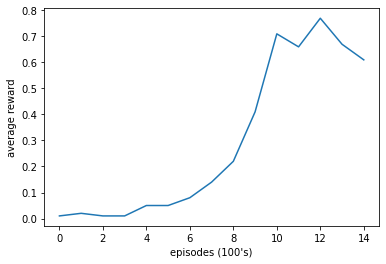

In [33]:
# we can plot the training progress and see how the agent improved
import matplotlib.pyplot as plt

def get_average(values):
  return sum(values)/len(values)

avg_rewards = []
for i in range(0, len(rewards), 100):
  avg_rewards.append(get_average(rewards[i:i+100])) 

plt.plot(avg_rewards)
plt.ylabel('average reward')
plt.xlabel('episodes (100\'s)')
plt.show()